# FIFA Wordl Cup Analysis
## Python 3 and Jupyter Lab
### Anaconda
By: Eng. Javier Blanco
10/25/2020

Data Set downloaded from: https://www.kaggle.com/abecklas/fifa-world-cup

WorldCupMatches.csv was downloaded



## Importing libraries and tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing raw data and cleaning it
raw_matches_df = pd.read_csv('WorldCupMatches.csv')
raw_matches_df

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Knowing how many rows and columns has this dataset
raw_matches_df.shape

(4572, 20)

In [4]:
#learn list of column names
raw_matches_df.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [5]:
# getting information summarized of data. Also, it guves information
#about columns, number of no-nulls values in each column, and so on. 

raw_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [6]:
#I will remove information abou Referee and assistants, to do so, I use drop pandas function
matches_df = raw_matches_df.drop(['Referee', 'Assistant 1', 'Assistant 2'], axis=1)
matches_df

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Removing NaN data
matches_df = matches_df.dropna()
matches_df.shape

(850, 17)

## Exploratory Analysis

This method involves performing operations on dataset in order to understand the data and learn potential patterns. Basically it helps us make sense of the data we have.

In [8]:
# Number od matches and teams
#we can use "groupby" function of Pandas and get macthes by Worldcup season
matches_per_season = matches_df.groupby('Year').MatchID.count()
matches_per_season

Year
1930.0    18
1934.0    17
1938.0    18
1950.0    22
1954.0    26
1958.0    35
1962.0    32
1966.0    32
1970.0    32
1974.0    38
1978.0    38
1982.0    52
1986.0    52
1990.0    52
1994.0    52
1998.0    64
2002.0    64
2006.0    64
2010.0    64
2014.0    78
Name: MatchID, dtype: int64

In [9]:
#we can plot a bar graph by using seaborn and matplotlib. 
#Some features must be adjusted at first
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

[Text(0, 0.5, 'Nº of Macthes'), Text(0.5, 0, 'Year')]

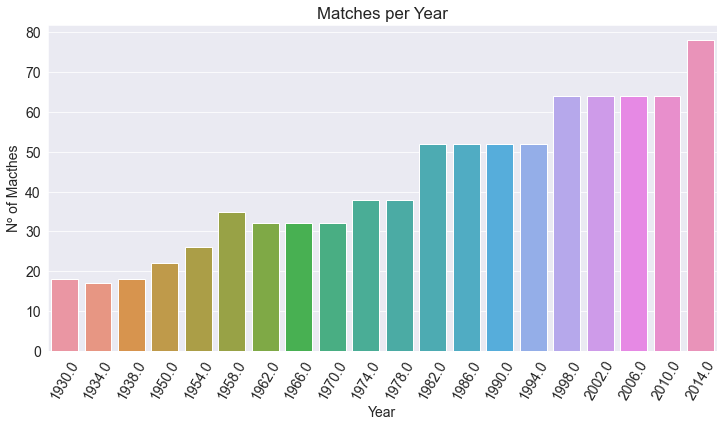

In [10]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=60)
plt.title("Matches per Year")
matches_per_season_plot = sns.barplot(
                                    x=matches_per_season.index,
                                    y=matches_per_season)
matches_per_season_plot.set(xlabel="Year", ylabel= 'Nº of Macthes')

In [11]:
#Wins an Winners
#filter1 = (matches_df.win_by_year == 0) & (matches_df.result=='normal')


In [12]:
#naming teams
matches_df = matches_df.rename(columns={'Home Team Name':'Winner', 'Away Team Name': 'Loser'})
matches_df

,Year,Datetime,Stage,Stadium,City,Winner,Home Team Goals,Away Team Goals,Loser,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,255957.0,300186502.0,BRA,NED


In [14]:
total_matches_played = (matches_df.Winner.value_counts() +
                       matches_df.Loser.value_counts()).sort_values(ascending = False)


In [17]:
total_matches_played=total_matches_played.dropna()
total_matches_played

Brazil                      108.0
Italy                        83.0
Argentina                    81.0
Germany FR                   62.0
England                      62.0
                            ...  
Czech Republic                3.0
rn">Trinidad and Tobago       3.0
Jamaica                       3.0
Iraq                          3.0
rn">United Arab Emirates      3.0
Length: 78, dtype: float64

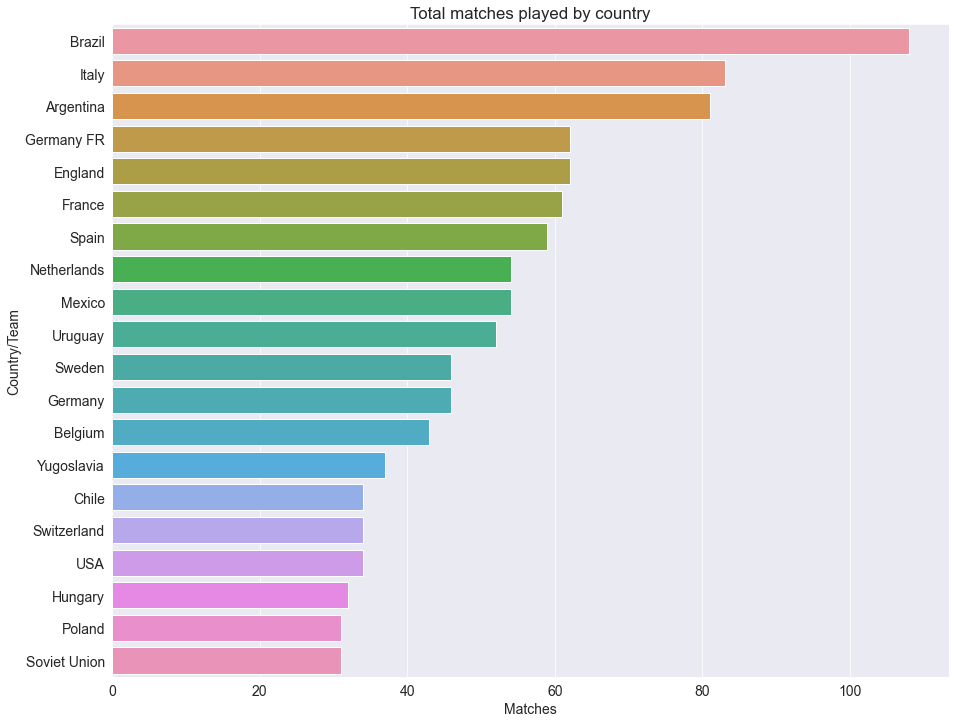

In [18]:
#graphically
df_matches_played = total_matches_played.head(20)
plt.figure(figsize=(15,12))
plt.title('Total matches played by country')
total_macthes_played_plot = sns.barplot(y=df_matches_played.index,
                                        x=df_matches_played)
total_macthes_played_plot.set(ylabel='Country/Team', xlabel = 'Matches');

In [19]:
#Legacy by calculating most wins
most_wins = matches_df.Winner.value_counts()
most_wins

Brazil                        82
Italy                         57
Argentina                     54
Germany FR                    43
England                       35
                              ..
rn">United Arab Emirates       1
Ukraine                        1
rn">Trinidad and Tobago        1
rn">Bosnia and Herzegovina     1
Haiti                          1
Name: Winner, Length: 78, dtype: int64

In [20]:
win_percen = (most_wins / total_matches_played).sort_values(ascending = False)*100
win_percen

Brazil          75.925926
Germany         69.565217
Germany FR      69.354839
Italy           68.674699
South Africa    66.666667
                  ...    
IR Iran         16.666667
Bolivia         16.666667
Iran            16.666667
New Zealand     16.666667
Norway          12.500000
Length: 78, dtype: float64

## Which are the most and least consistent teams across all seasons?

In [21]:
# Created a data frame between different values of winner and season using pd.crosstab().
#Plotted the data frame as a heatmap.
won_each_match = pd.crosstab(matches_df['Winner'], matches_df['Year'])
won_each_match

Year,1930.0,1934.0,1938.0,1950.0,1954.0,1958.0,1962.0,1966.0,1970.0,1974.0,1978.0,1982.0,1986.0,1990.0,1994.0,1998.0,2002.0,2006.0,2010.0,2014.0
Winner,,,,,,,,,,,,,,,,,,,,
Algeria,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,1,1
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Argentina,4,0,0,0,0,2,1,2,0,4,6,4,6,3,3,4,2,3,4,6
Australia,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,1,2
Austria,0,2,0,0,4,0,0,0,0,0,3,2,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"rn"">Bosnia and Herzegovina",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
"rn"">Republic of Ireland",0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,1,0,0,0
"rn"">Serbia and Montenegro",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


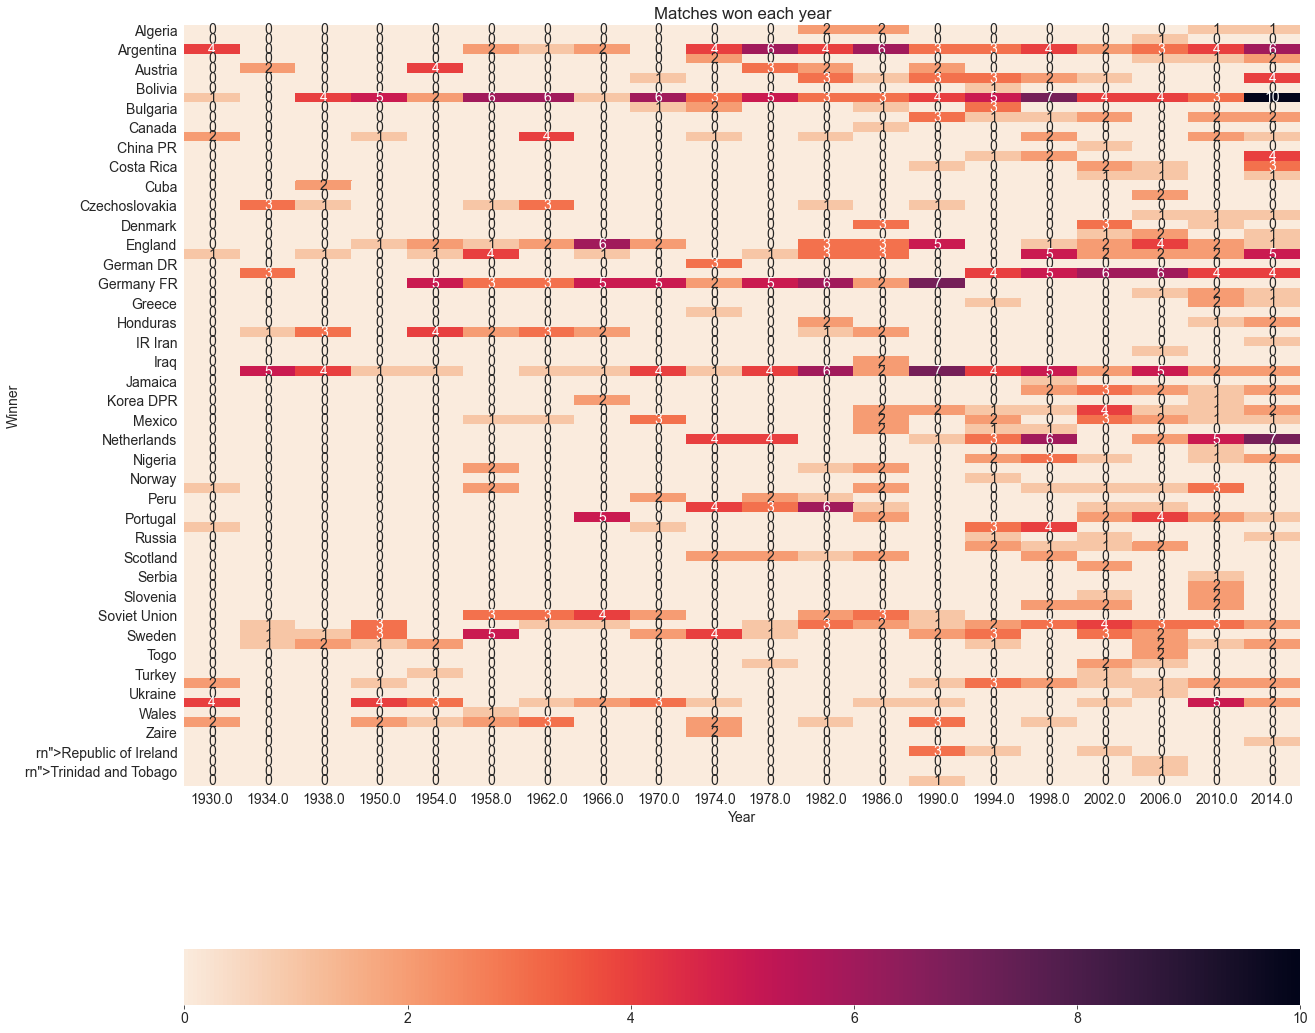

In [22]:
plt.figure(figsize=(20,20))
plt.xlabel('Year')
plt.ylabel('Team')
plt.title('Matches won each year')
sns.heatmap(won_each_match, annot = True, cmap = 'rocket_r', fmt='d',
                           cbar_kws={"orientation": "horizontal"});

In [30]:
best_ones = won_each_match.loc[['Brazil', 'Argentina', 'Uruguay','Germany', 'Spain']]
best_ones

Year,1930.0,1934.0,1938.0,1950.0,1954.0,1958.0,1962.0,1966.0,1970.0,1974.0,1978.0,1982.0,1986.0,1990.0,1994.0,1998.0,2002.0,2006.0,2010.0,2014.0
Winner,,,,,,,,,,,,,,,,,,,,
Brazil,1,0,4,5,2,6,6,1,6,3,5,3,3,4,5,7,4,4,3,10
Argentina,4,0,0,0,0,2,1,2,0,4,6,4,6,3,3,4,2,3,4,6
Uruguay,4,0,0,4,3,0,1,2,3,1,0,0,1,1,0,0,1,0,5,2
Germany,0,3,0,0,0,0,0,0,0,0,0,0,0,0,4,5,6,6,4,4
Spain,0,1,0,3,0,0,1,1,0,0,1,3,2,1,2,3,4,3,3,2


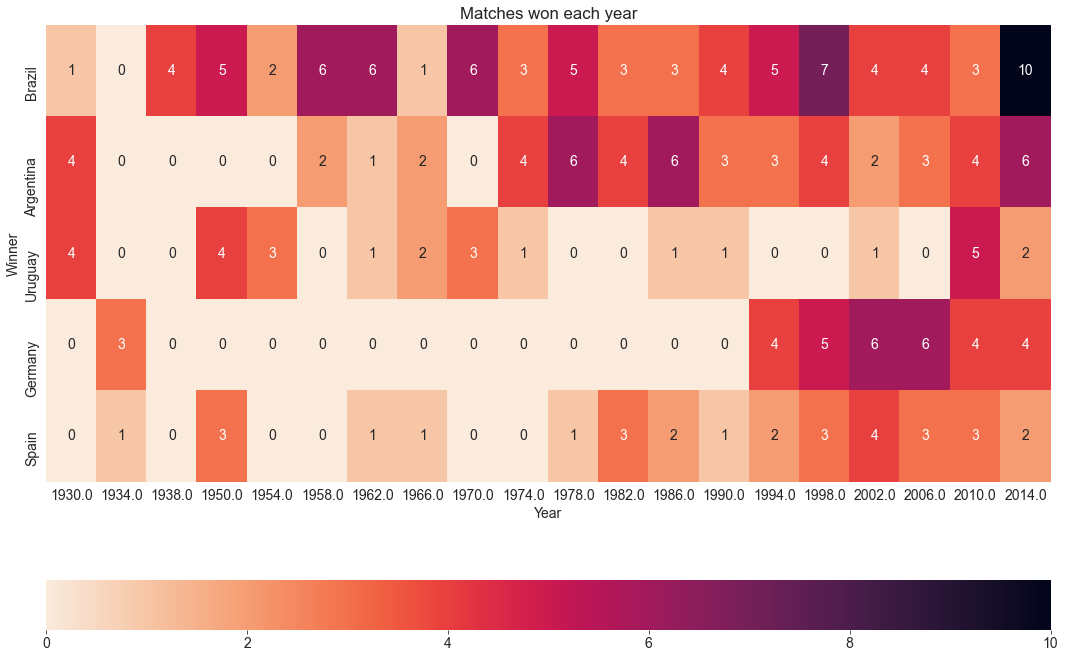

In [31]:
plt.figure(figsize=(18,12))
plt.xlabel('Year')
plt.ylabel('Team')
plt.title('Matches won each year')
sns.heatmap(best_ones, annot = True, cmap = 'rocket_r', fmt='d',
                           cbar_kws={"orientation": "horizontal"});